In [1463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [1749]:
train = pd.read_csv("/Users/amirahnurazman/Downloads/food_dataset/train.csv")
test = pd.read_csv("/Users/amirahnurazman/Downloads/food_dataset/test.csv")
sample_submit = pd.read_csv("/Users/amirahnurazman/Downloads/food_dataset/Sample_Submission.csv")

In [1751]:
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [1753]:
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [1755]:
train.shape, test.shape

((45593, 20), (11399, 19))

In [1757]:
train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [1759]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [1761]:
train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [1763]:
train.duplicated().sum()

0

In [1765]:
def consistent_data(data):
    if 'Time_taken(min)' in data.columns:
        data['Time_taken(min)'] = data['Time_taken(min)'].apply(lambda x:int(x.split(" ")[1].strip()))
        
    if 'Weatherconditions' in data.columns:
        data['Weatherconditions'] = data['Weatherconditions'].apply(lambda x:x.split(" ")[1].strip())

    if 'Delivery_person_ID' in data.columns:
        data['City_code'] = data['Delivery_person_ID'].apply(lambda x:x.split("RES")[0].strip())

    return data

In [1767]:
train = consistent_data(train)
train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,CHEN


In [1769]:
test = consistent_data(test)
test.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,COIMB
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,BANG
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,JAP
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1,No,Metropolitian,JAP
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,CHEN


In [1771]:
def null_data(data):
    data.replace("NaN", float(np.nan), regex=True, inplace=True)
    null_summary = data.isnull().sum()
    print(null_summary)
    return data

In [1773]:
train = null_data(train)
train.head()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
City_code                         0
dtype: int64


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,CHEN


In [1775]:
test = null_data(test)
test.head()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
City_code                        0
dtype: int64


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,COIMB
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,BANG
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,JAP
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,Fog,Medium,1,Meal,scooter,1,No,Metropolitian,JAP
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,CHEN


In [1777]:
train.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
train.shape

(45593, 19)

In [1779]:
test_Id=test["ID"]
test.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
test.shape

(11399, 18)

In [1781]:
def datatype(data):
    data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'], errors='coerce')
    data['Delivery_person_Ratings'] = pd.to_numeric(data['Delivery_person_Ratings'], errors='coerce')
    data['multiple_deliveries'] = pd.to_numeric(data['multiple_deliveries'], errors='coerce')
    data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='%d-%m-%Y')
    data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
    data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])
    return data

In [1783]:
train = datatype(train)
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [1785]:
test = datatype(test)
test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code
0,NaN,NaN,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,0 days 15:05:00,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,COIMB
1,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,0 days 20:30:00,0 days 20:35:00,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,BANG
2,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,0 days 19:35:00,0 days 19:45:00,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,JAP
3,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,0 days 17:15:00,0 days 17:20:00,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,JAP
4,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,0 days 18:25:00,0 days 18:40:00,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,CHEN


In [1787]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Delivery_person_Age          43739 non-null  float64        
 1   Delivery_person_Ratings      43685 non-null  float64        
 2   Restaurant_latitude          45593 non-null  float64        
 3   Restaurant_longitude         45593 non-null  float64        
 4   Delivery_location_latitude   45593 non-null  float64        
 5   Delivery_location_longitude  45593 non-null  float64        
 6   Order_Date                   45593 non-null  datetime64[ns] 
 7   Time_Orderd                  43862 non-null  timedelta64[ns]
 8   Time_Order_picked            45593 non-null  timedelta64[ns]
 9   Weatherconditions            44977 non-null  object         
 10  Road_traffic_density         44992 non-null  object         
 11  Vehicle_condition           

In [1789]:
cat_col = train[['Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 
                 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 
                 'Festival', 'City', 'City_code']]

num_col = train[['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 
                 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']]

In [1791]:
for col in cat_col.columns:
    print(f"\nColumn: {col}")
    print(train[col].value_counts())


Column: Weatherconditions
Weatherconditions
Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: count, dtype: int64

Column: Road_traffic_density
Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
Name: count, dtype: int64

Column: Vehicle_condition
Vehicle_condition
2    15034
1    15030
0    15009
3      520
Name: count, dtype: int64

Column: Type_of_order
Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

Column: Type_of_vehicle
Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

Column: multiple_deliveries
multiple_deliveries
1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: count, dtype: int64

Column: Festival
Festival
No      44469
Yes       896
Name: count, dtype: int64

Column: City
City
Metropolitian     3409

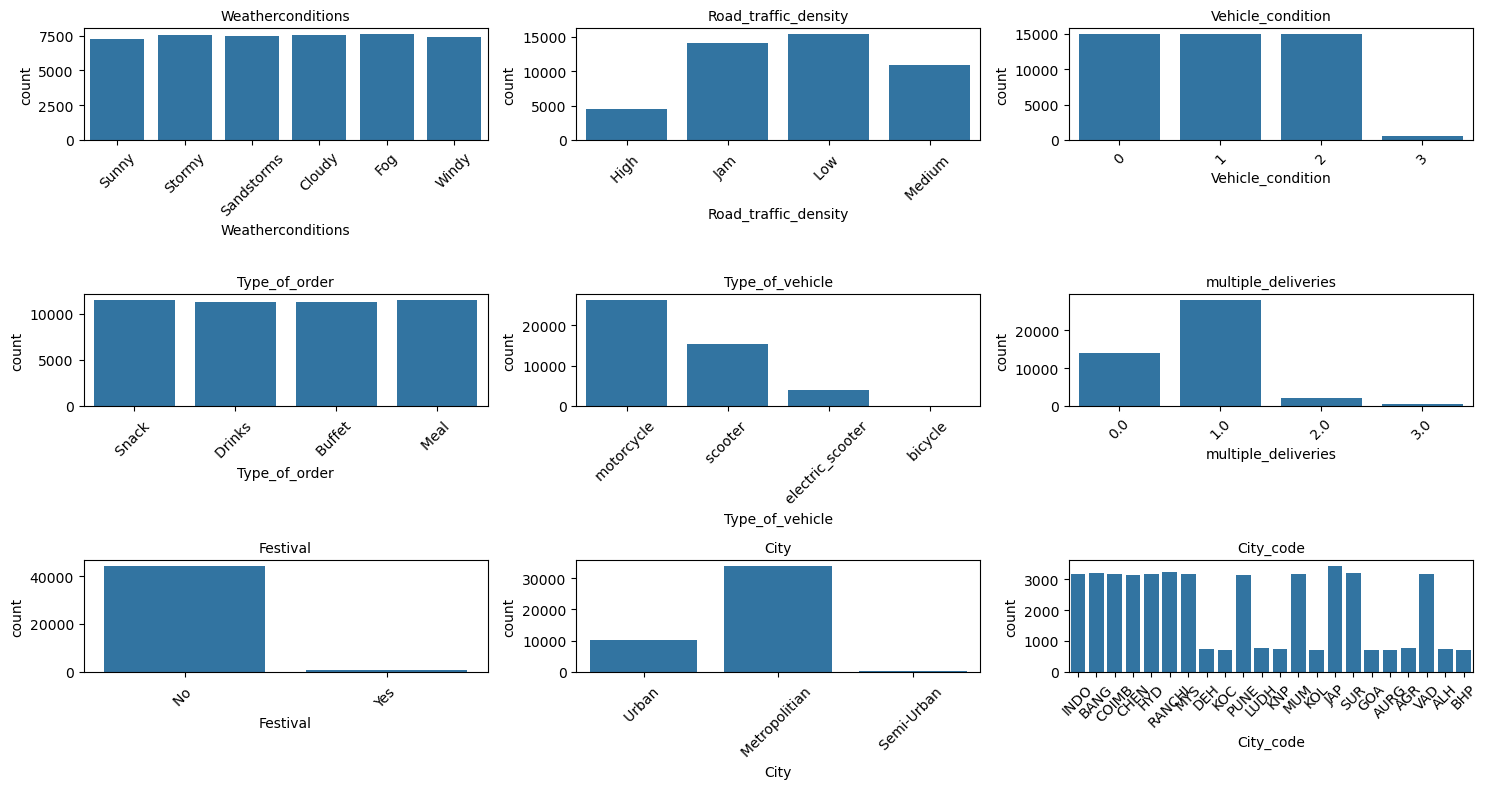

In [1485]:
fig = plt.figure(figsize=(15, 8))

for i, col in enumerate(cat_col.columns, start=1):
    plt.subplot(3, 3, i)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
    sns.countplot(data=train, x=col)

plt.tight_layout()
plt.show()

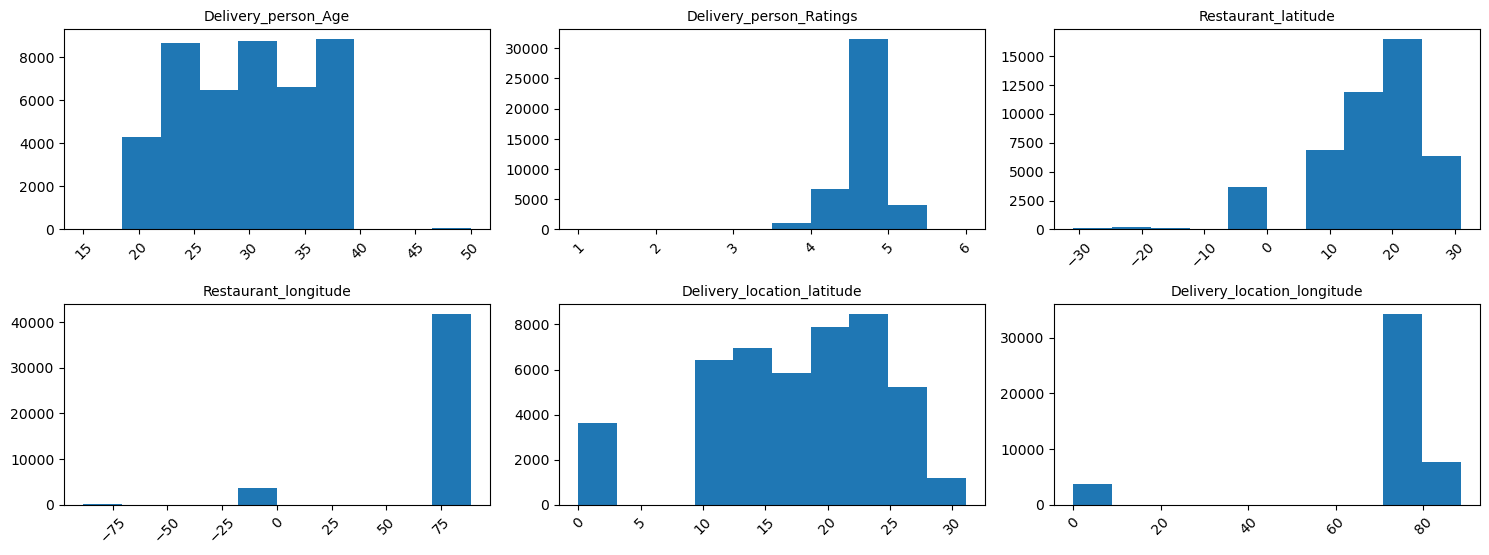

In [1486]:
fig = plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col.columns, start=1):
    plt.subplot(3, 3, i)
    plt.hist(num_col[col])
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [1487]:
num_col.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452


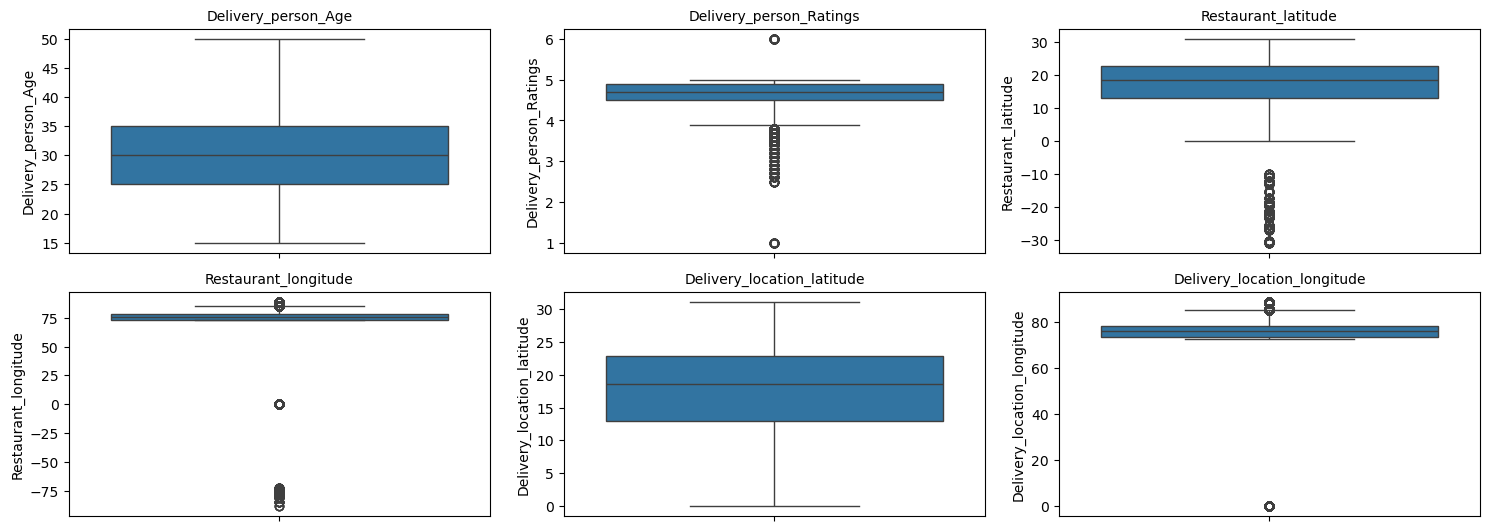

In [1488]:
fig = plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col.columns, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(num_col[col])
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [1793]:
# Handle Missing Values
def fill_na (data):
    data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].median(), inplace=True)
    data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median(), inplace=True)
    data['Weatherconditions'].fillna(data['Weatherconditions'].mode()[0], inplace=True)
    data['Road_traffic_density'].fillna(data['Road_traffic_density'].mode()[0], inplace=True)
    data['multiple_deliveries'].fillna(data['multiple_deliveries'].mode()[0], inplace=True)
    data['Festival'].fillna(data['Festival'].mode()[0], inplace=True)
    data['City'].fillna(data['City'].mode()[0], inplace=True)
    return data

In [1795]:
train = fill_na(train)
train.isnull().sum()

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/2090700211.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/2090700211.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [1797]:
test = fill_na(test)
test.isnull().sum()

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/2090700211.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/2090700211.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Delivery_person_Age              0
Delivery_person_Ratings          0
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions                0
Road_traffic_density             0
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries              0
Festival                         0
City                             0
City_code                        0
dtype: int64

In [1799]:
#Feature Engineering 

def extract_date(data):
    data['month'] = data.Order_Date.dt.month
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)
    return data

In [1801]:
train = extract_date(train)
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,month,day_of_week,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,Sunny,...,Snack,motorcycle,0.0,No,Urban,24,INDO,3,5,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,Stormy,...,Snack,scooter,1.0,No,Metropolitian,33,BANG,3,4,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,Sandstorms,...,Drinks,motorcycle,1.0,No,Urban,26,BANG,3,5,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,Sunny,...,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,4,1,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,Cloudy,...,Snack,scooter,1.0,No,Metropolitian,30,CHEN,3,5,1


In [1803]:
test = extract_date(test)
test.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,month,day_of_week,is_weekend
0,30.0,4.7,11.003669,76.976494,11.043669,77.016494,2022-03-30,NaT,0 days 15:05:00,Sunny,...,3,Drinks,electric_scooter,1.0,No,Metropolitian,COIMB,3,2,0
1,28.0,4.6,12.975377,77.696664,13.085377,77.806664,2022-03-29,0 days 20:30:00,0 days 20:35:00,Windy,...,0,Snack,motorcycle,1.0,No,Metropolitian,BANG,3,1,0
2,23.0,4.5,26.911378,75.789034,27.001378,75.879034,2022-03-10,0 days 19:35:00,0 days 19:45:00,Stormy,...,0,Drinks,motorcycle,1.0,No,Metropolitian,JAP,3,3,0
3,21.0,4.8,26.766536,75.837333,26.856536,75.927333,2022-04-02,0 days 17:15:00,0 days 17:20:00,Fog,...,1,Meal,scooter,1.0,No,Metropolitian,JAP,4,5,1
4,31.0,4.6,12.986047,80.218114,13.096047,80.328114,2022-03-27,0 days 18:25:00,0 days 18:40:00,Sunny,...,2,Drinks,scooter,1.0,No,Metropolitian,CHEN,3,6,1


In [1805]:
#Feature Engineering 
#Calculate prepare_time 

def prepare_time(data):
    data['Time_Order_picked_new'] = np.where(data['Time_Order_picked'] < data['Time_Orderd'], data['Order_Date'] + pd.DateOffset(1) + data['Time_Order_picked'], 
                                           data['Order_Date'] + data['Time_Order_picked'])
    
    data['Time_Ordered_new'] = data['Order_Date'] + data['Time_Orderd']
    data['Order_prepare_time'] = (data['Time_Order_picked_new'] - data['Time_Ordered_new']).dt.total_seconds() / 60
    data['Order_prepare_time'].fillna(data['Order_prepare_time'].median(), inplace=True)
    data.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_new', 'Time_Order_picked_new', 'Order_Date'], axis=1, inplace=True)
    return data

In [1807]:
train = prepare_time(train)
train.head()

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/3470455093.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,month,day_of_week,is_weekend,Order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,3,5,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,3,4,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,3,5,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,4,1,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,3,5,1,15.0


In [1809]:
test = prepare_time(test)
test.head()

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/3470455093.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,month,day_of_week,is_weekend,Order_prepare_time
0,30.0,4.7,11.003669,76.976494,11.043669,77.016494,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,COIMB,3,2,0,10.0
1,28.0,4.6,12.975377,77.696664,13.085377,77.806664,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,BANG,3,1,0,5.0
2,23.0,4.5,26.911378,75.789034,27.001378,75.879034,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,JAP,3,3,0,10.0
3,21.0,4.8,26.766536,75.837333,26.856536,75.927333,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,JAP,4,5,1,5.0
4,31.0,4.6,12.986047,80.218114,13.096047,80.328114,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,CHEN,3,6,1,15.0


In [1811]:
#Feature Engineering 
#Calculate distance
from geopy.distance import geodesic

def distance_km(data):
    restaurant_coordinates = data[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates = data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    data['distance_km'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    data['distance_km'] = [geodesic(restaurant, delivery).km for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)]
    data.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'], axis=1, inplace=True)
    return data

In [1813]:
train = distance_km(train)
train.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,month,day_of_week,is_weekend,Order_prepare_time,distance_km
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,3,5,1,15.0,3.020737
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,3,4,0,5.0,20.143737
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,3,5,1,15.0,1.549693
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,4,1,0,10.0,7.774497
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,3,5,1,15.0,6.197898


In [1815]:
test = distance_km(test)
test.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,City_code,month,day_of_week,is_weekend,Order_prepare_time,distance_km
0,30.0,4.7,Sunny,Low,3,Drinks,electric_scooter,1.0,No,Metropolitian,COIMB,3,2,0,10.0,6.219648
1,28.0,4.6,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,BANG,3,1,0,5.0,17.042985
2,23.0,4.5,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,JAP,3,3,0,10.0,13.390474
3,21.0,4.8,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,JAP,4,5,1,5.0,13.397932
4,31.0,4.6,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,CHEN,3,6,1,15.0,17.042634


In [1817]:
train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'month', 'day_of_week', 'is_weekend',
       'Order_prepare_time', 'distance_km'],
      dtype='object')

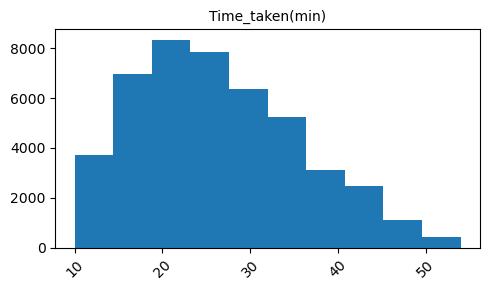

In [1498]:
#EDA
#Target variable 
fig = plt.figure(figsize=(5, 3))
plt.hist(train['Time_taken(min)'])
plt.title('Time_taken(min)', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

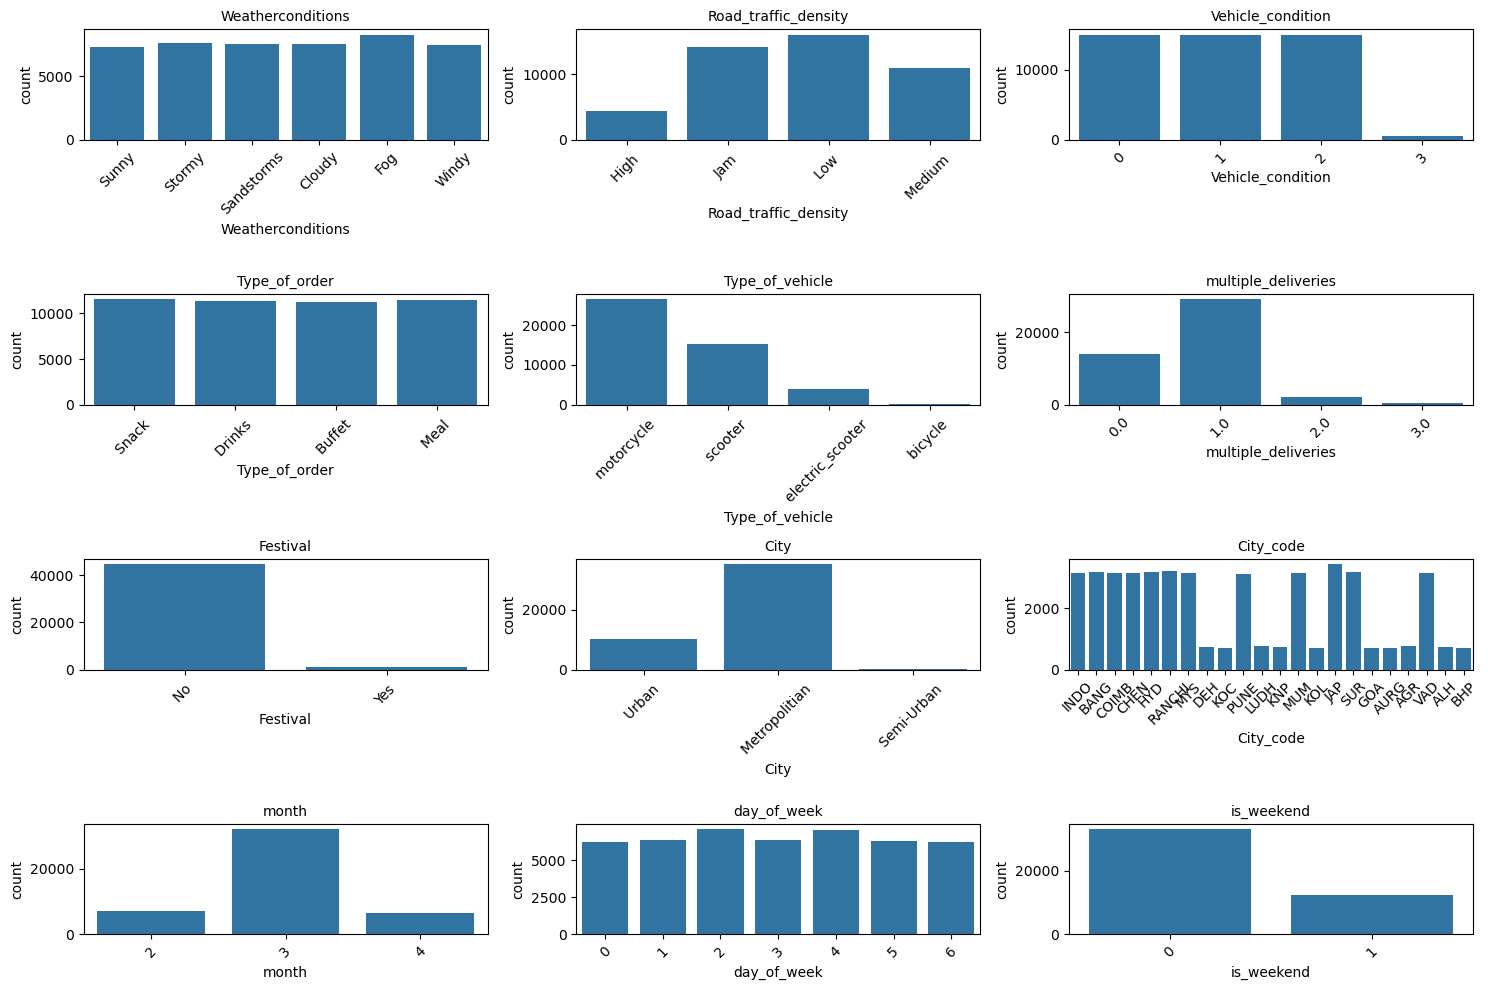

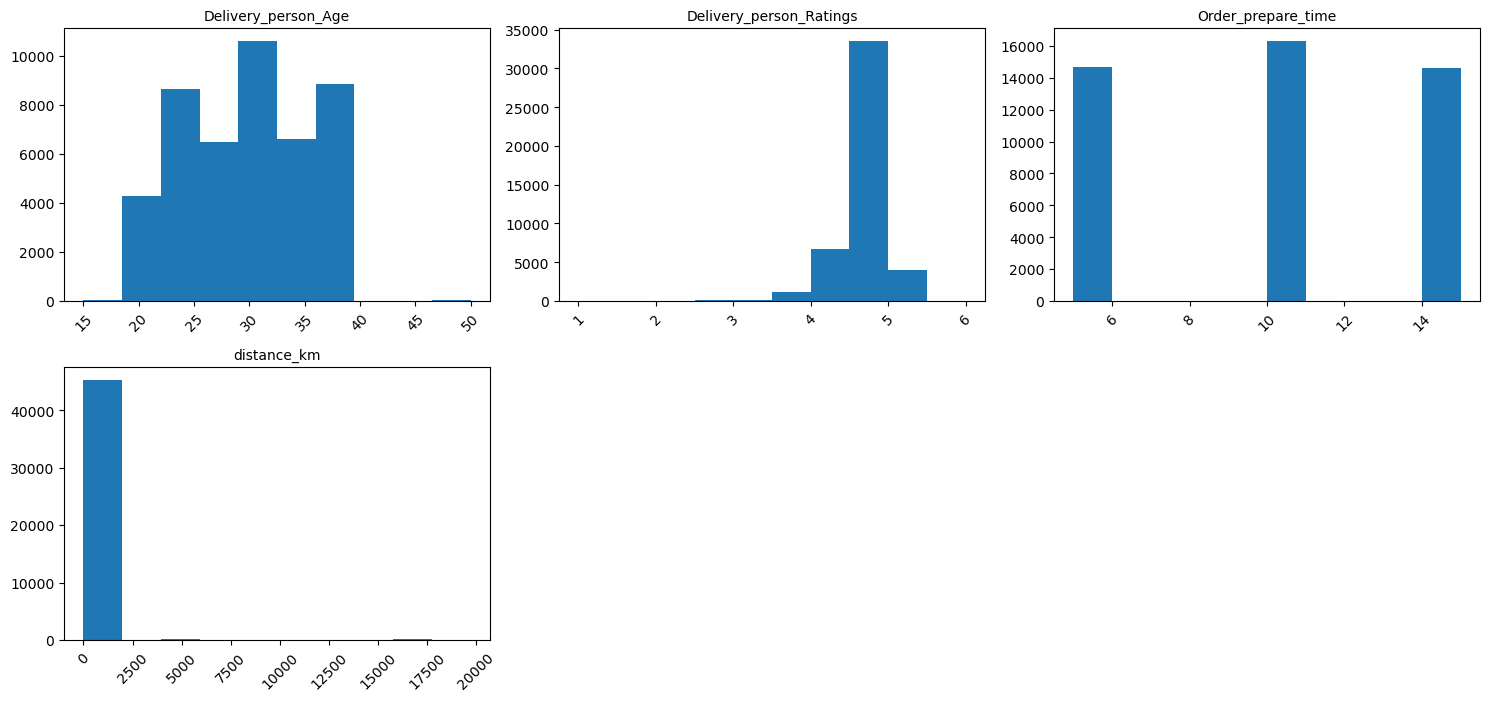

In [1499]:
#EDA
#Univariate Analysis 

new_cat_col = train[['Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 
                 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 
                 'Festival', 'City', 'City_code', 'month', 'day_of_week', 'is_weekend']]

fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(new_cat_col.columns, start=1):
    plt.subplot(4, 3, i)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
    sns.countplot(data=train, x=col)
plt.tight_layout()
plt.show()

new_num_col = train[['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_prepare_time', 'distance_km']] 

fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(new_num_col.columns, start=1):
    plt.subplot(3, 3, i)
    plt.hist(new_num_col[col])
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

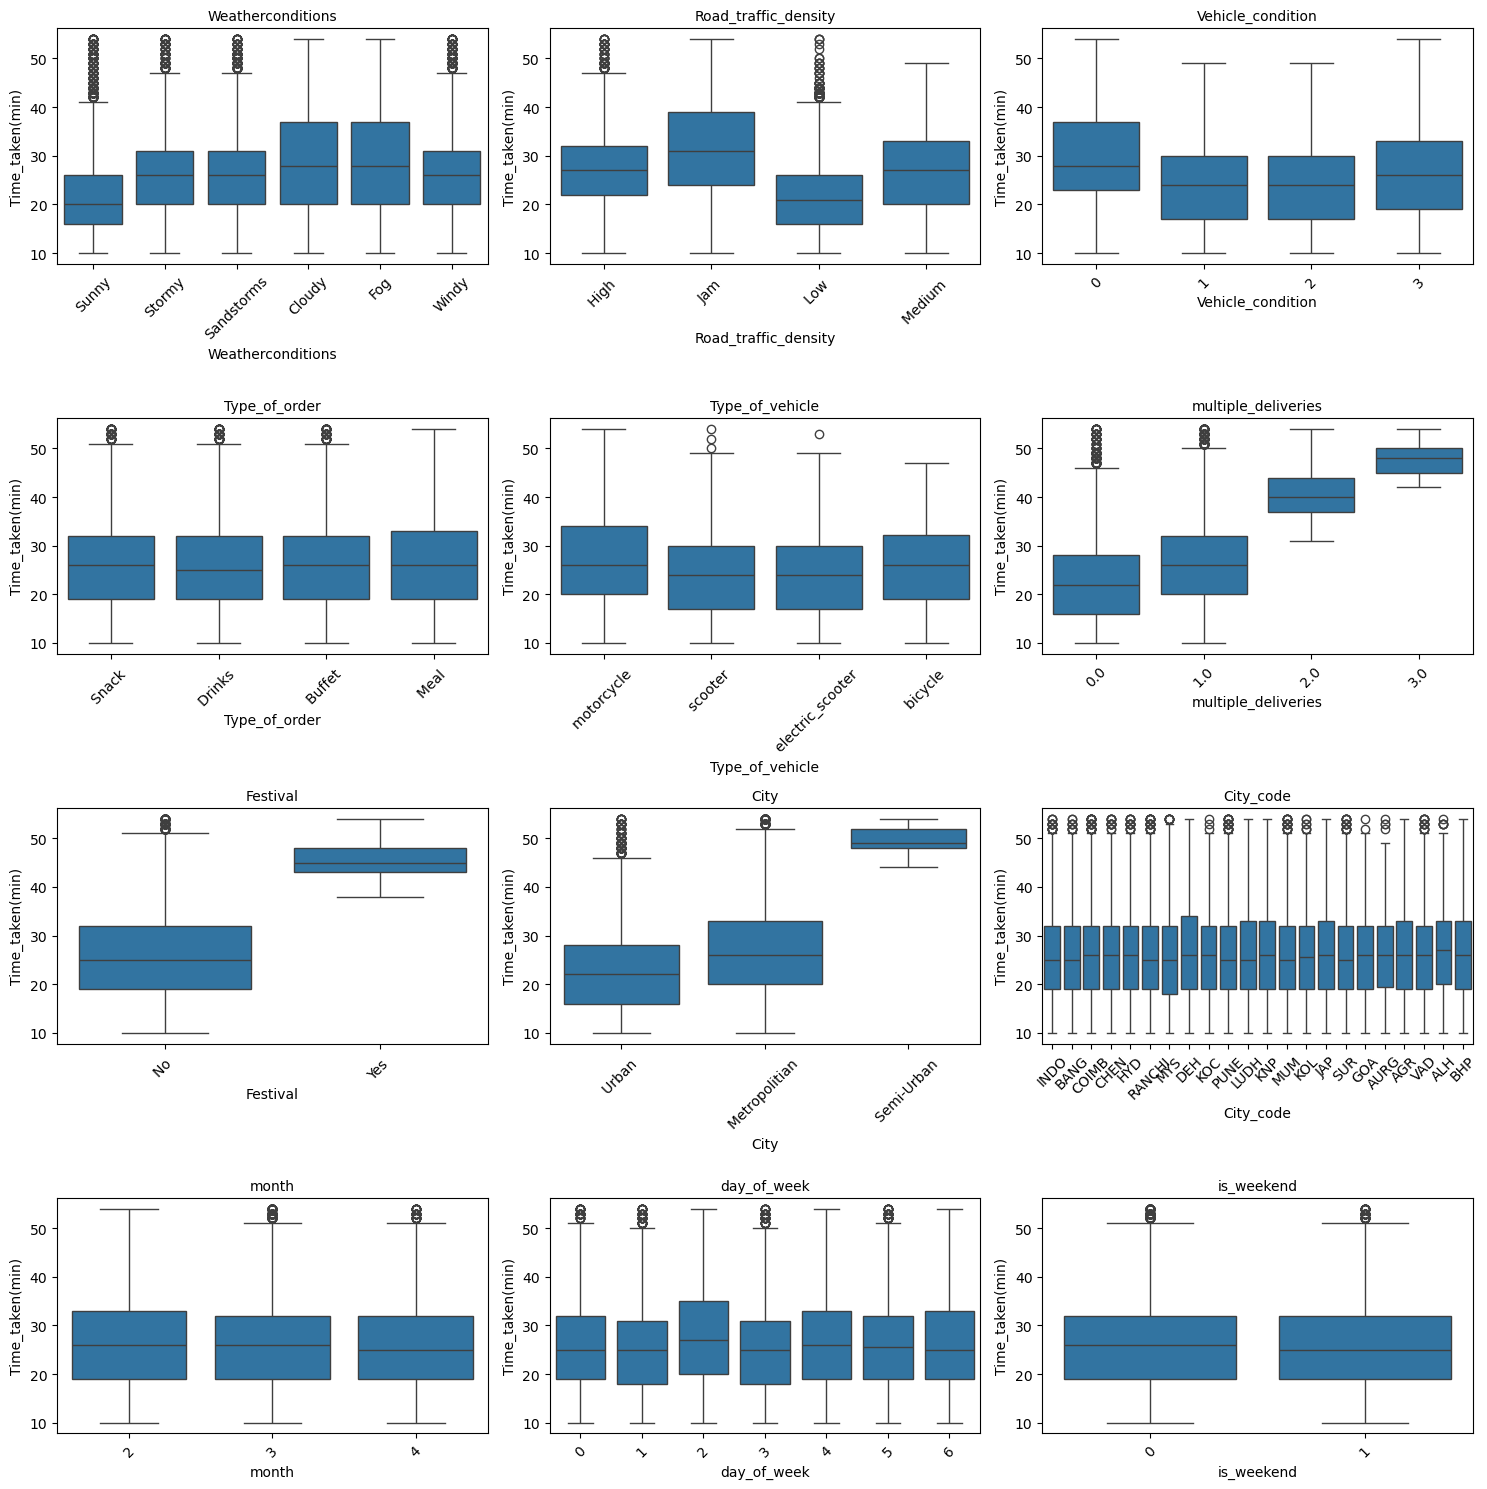

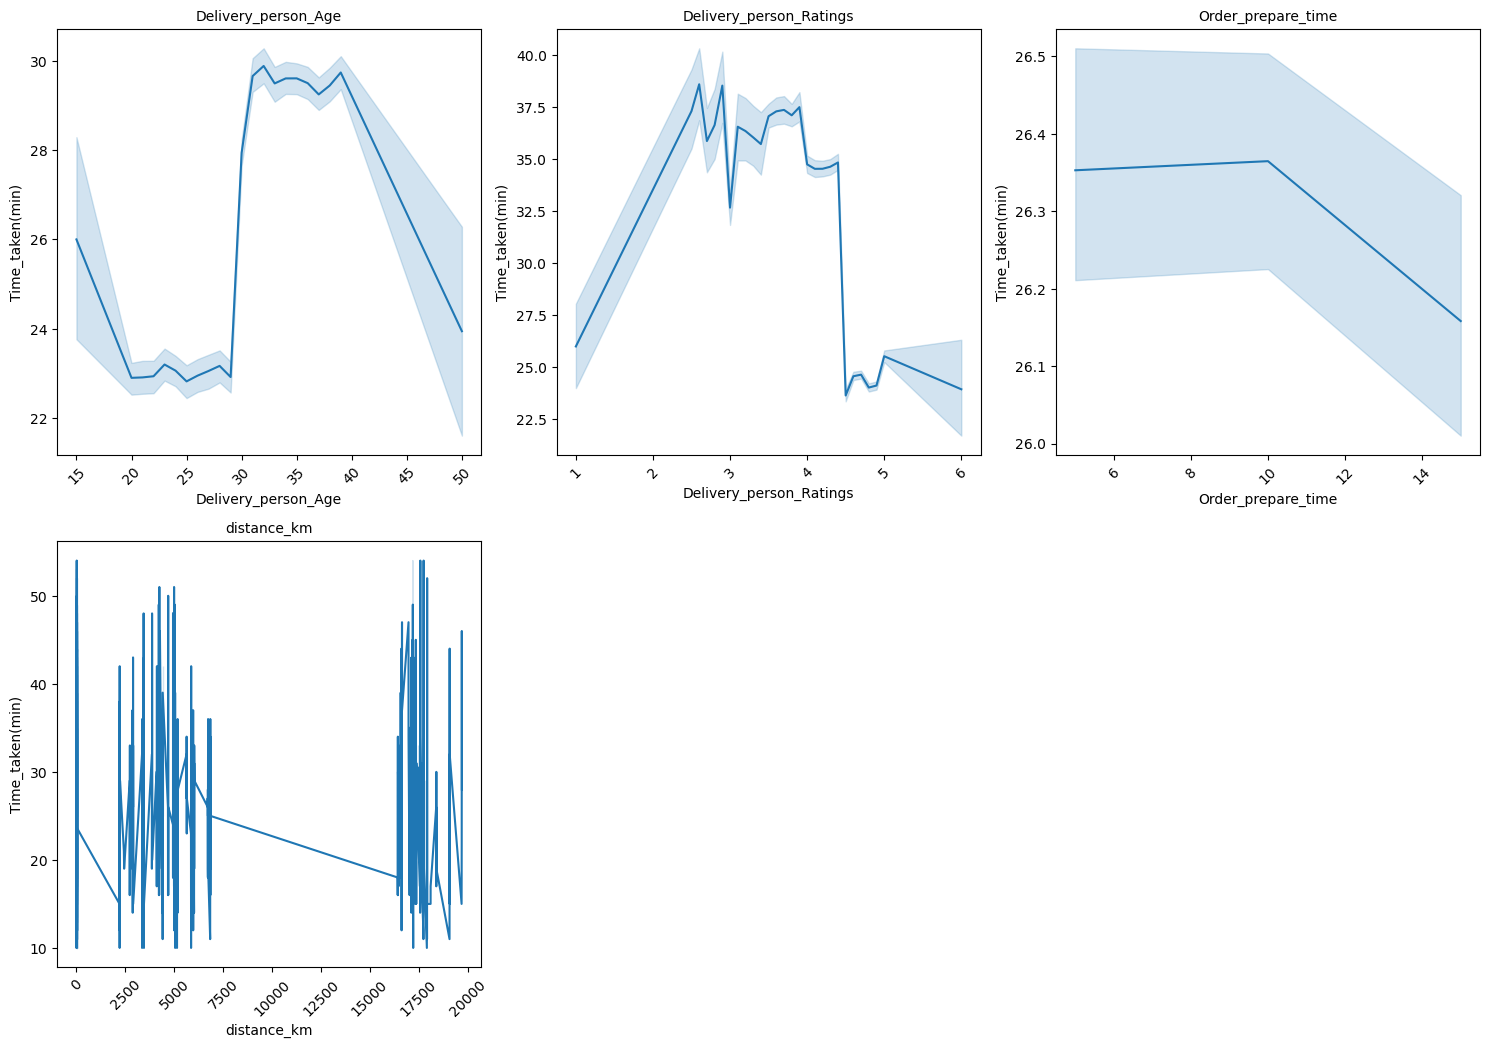

In [1500]:
#Bivariate Analysis

fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(new_cat_col.columns, start=1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=new_cat_col[col], y=train['Time_taken(min)']) 
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 15))
for i, col in enumerate(new_num_col.columns, start=1):
    plt.subplot(3, 3, i)
    sns.lineplot(x=new_num_col[col], y=train['Time_taken(min)'], estimator=np.mean)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

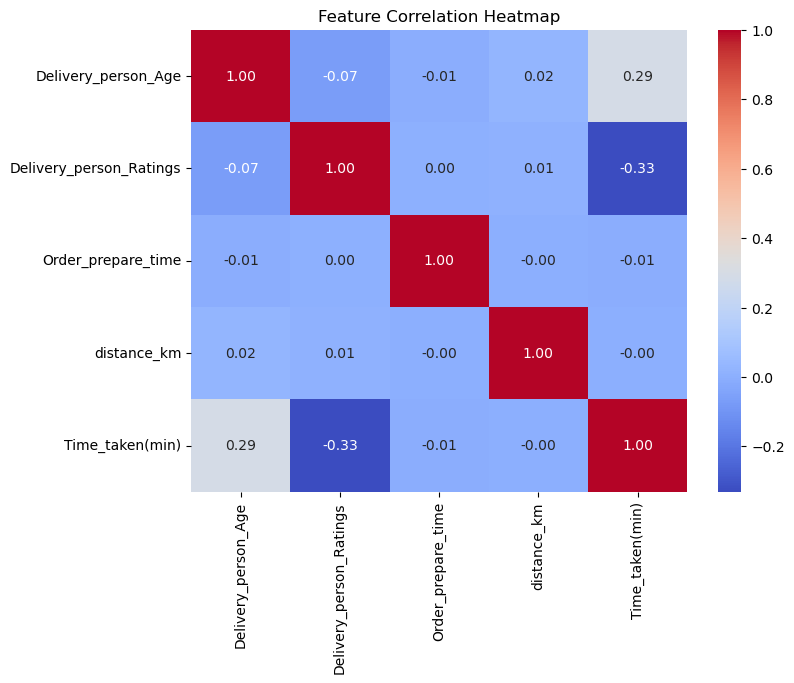

In [1501]:
#Multivariate Analysis 

num_features = new_num_col.columns.tolist()
corr_matrix = train[num_features + ['Time_taken(min)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

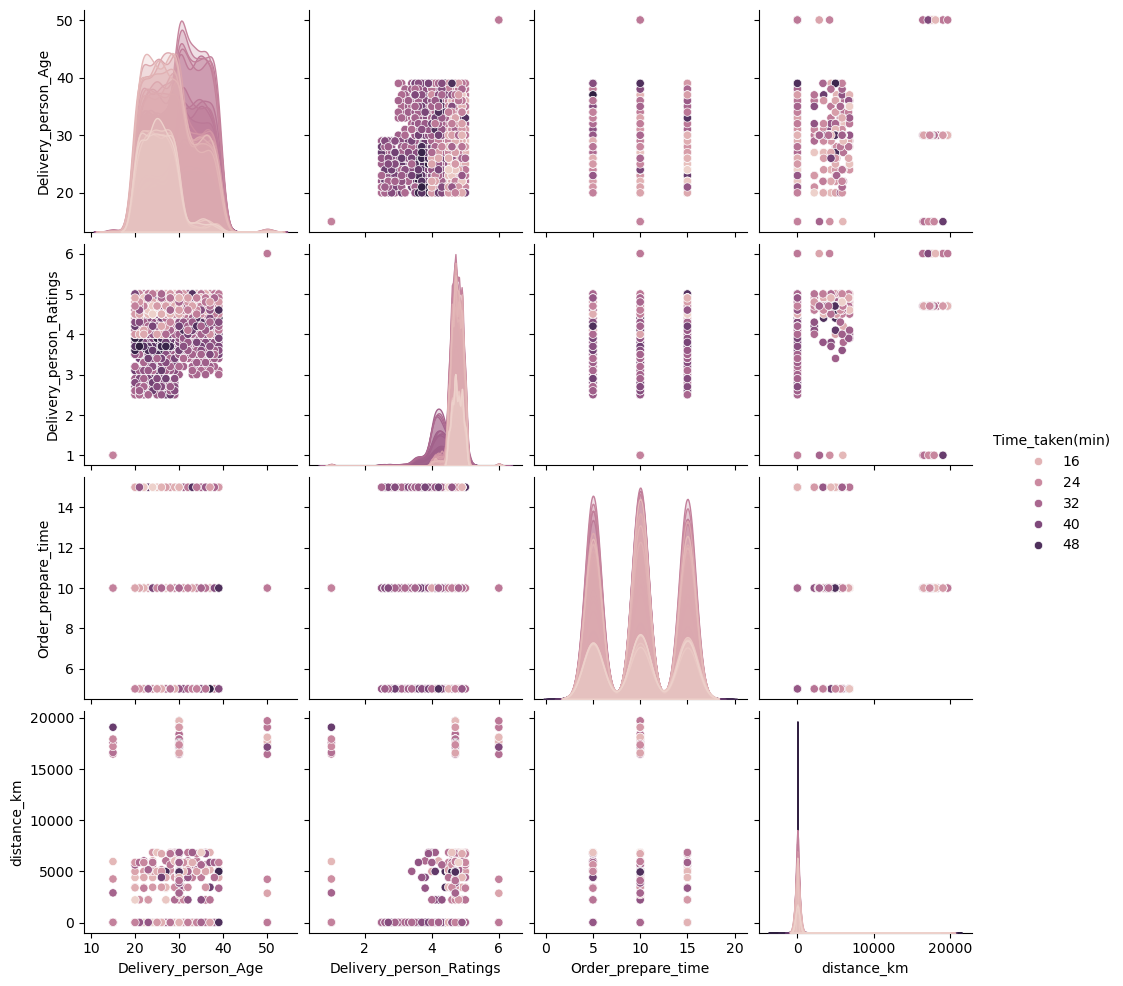

In [1502]:
sns.pairplot(train[num_features + ['Time_taken(min)']], hue='Time_taken(min)')
plt.show()

In [1819]:
#Detect outliers using IQR method

def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

outliers = {}

for col in new_num_col.columns:
    outliers[col] = detect_outliers(train, col)

for col, outlier_data in outliers.items():
    print(f"Outliers in column '{col}': {len(outlier_data)}")

Outliers in column 'Delivery_person_Age': 53
Outliers in column 'Delivery_person_Ratings': 5345
Outliers in column 'Order_prepare_time': 0
Outliers in column 'distance_km': 431


In [1821]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder

transform_cat = ['Weatherconditions', 'Road_traffic_density', 'Type_of_vehicle', 
                 'Festival', 'City']

transform_num = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_prepare_time', 
                 'distance_km', 'Vehicle_condition', 'multiple_deliveries', 
                 'day_of_week', 'is_weekend']  

label_encoders = {col: LabelEncoder() for col in transform_cat}
for col, le in label_encoders.items():
    train[col] = le.fit_transform(train[col])

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), transform_num),],remainder='passthrough')

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = train.drop(columns=['Type_of_order', 'City_code', 'month', 'Time_taken(min)'])
y_train = train['Time_taken(min)']  

transformed_train = pipeline.fit_transform(X_train)
transformed_col_names = transform_num + transform_cat  
trans_train_df = pd.DataFrame(transformed_train, columns=transformed_col_names)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

trans_train_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_prepare_time,distance_km,Vehicle_condition,multiple_deliveries,day_of_week,is_weekend,Weatherconditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,1.301775,0.803435,1.249699,-0.087442,1.163977,-1.322160,1.016564,1.623606,4.0,0.0,2.0,0.0,2.0
1,0.775114,-0.416440,-1.244611,-0.071874,1.163977,0.440192,0.508872,-0.615913,3.0,1.0,3.0,0.0,0.0
2,-1.155974,-0.721409,1.249699,-0.088779,-1.219656,0.440192,1.016564,1.623606,2.0,2.0,2.0,0.0,2.0
3,1.477328,0.193498,0.002544,-0.083120,-1.219656,0.440192,-1.014203,-0.615913,4.0,3.0,2.0,0.0,0.0
4,0.424007,-0.111471,1.249699,-0.084553,-0.027839,0.440192,1.016564,1.623606,0.0,0.0,3.0,0.0,0.0


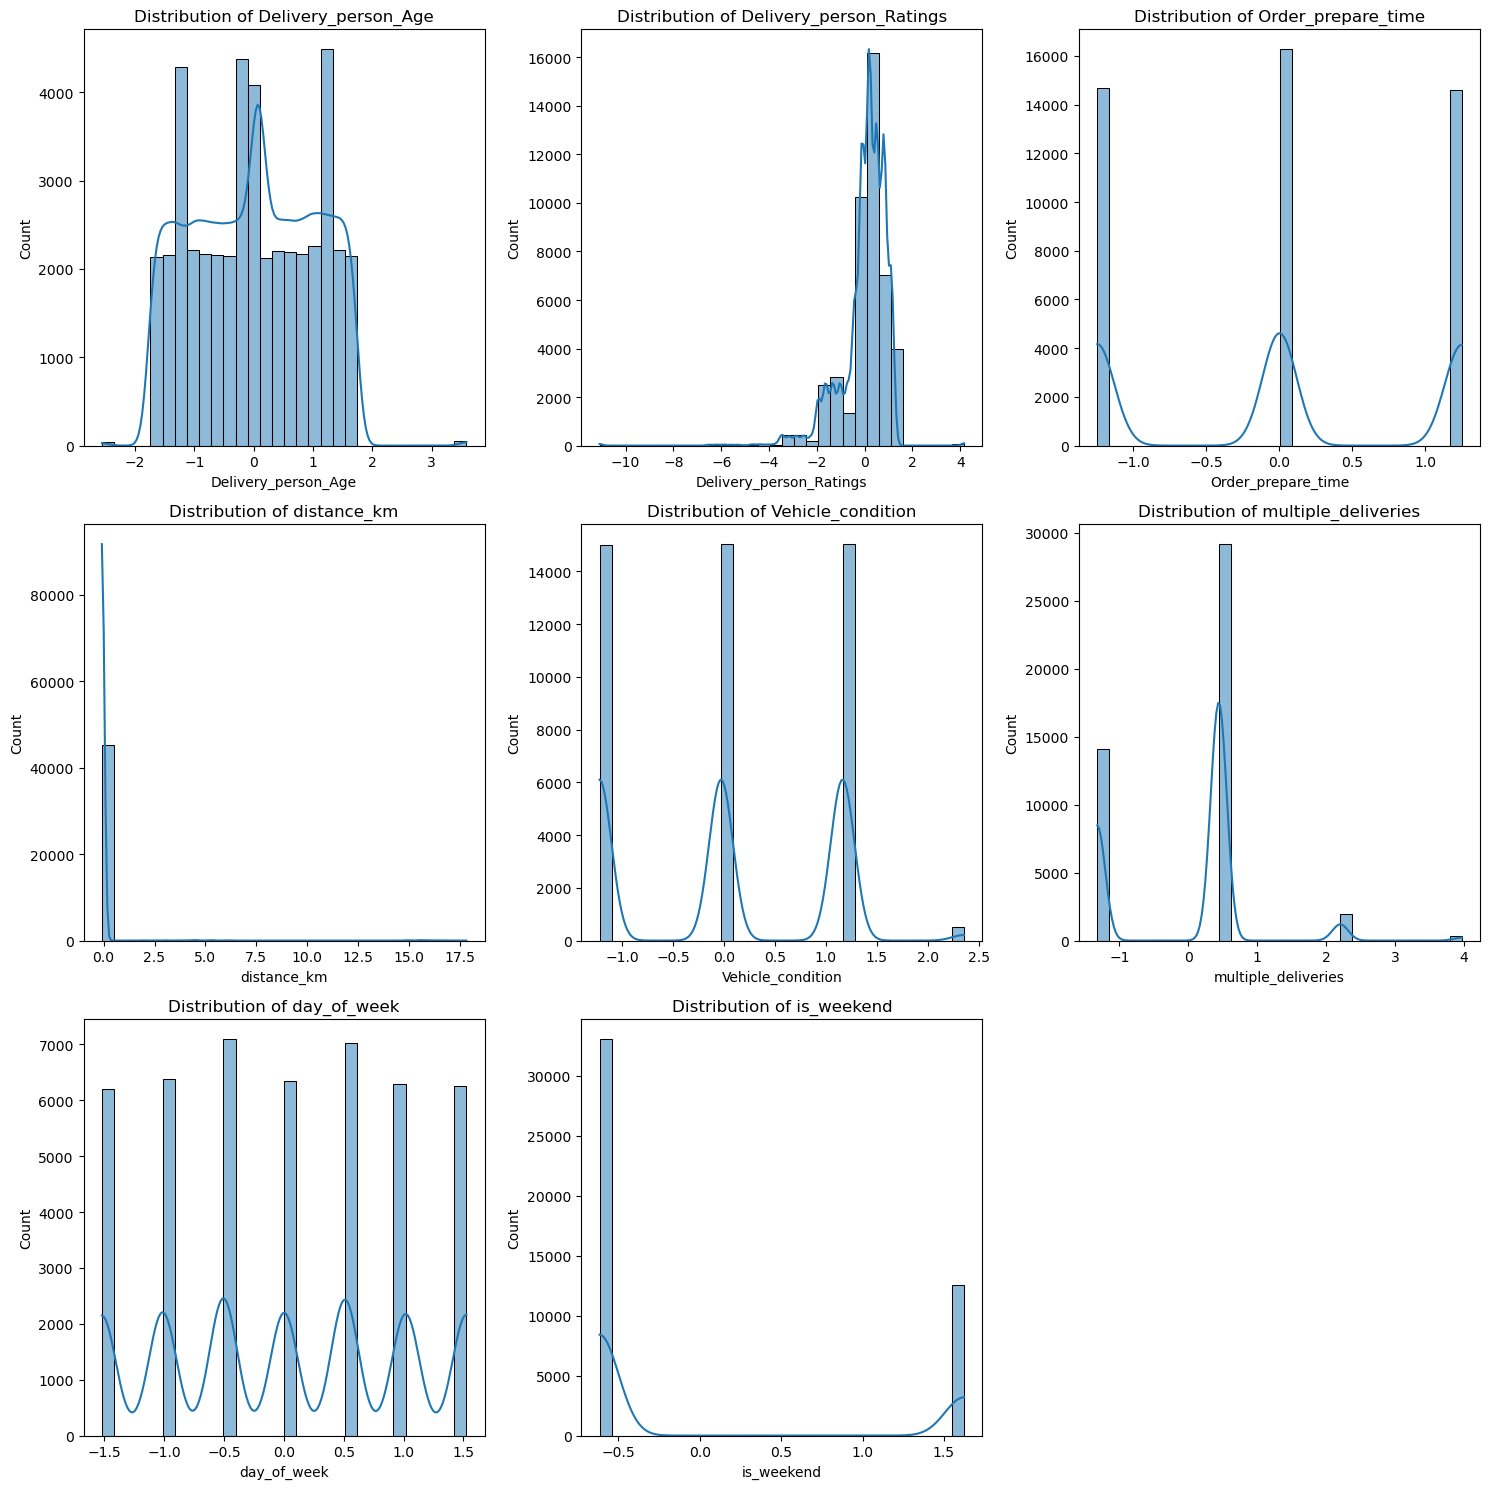

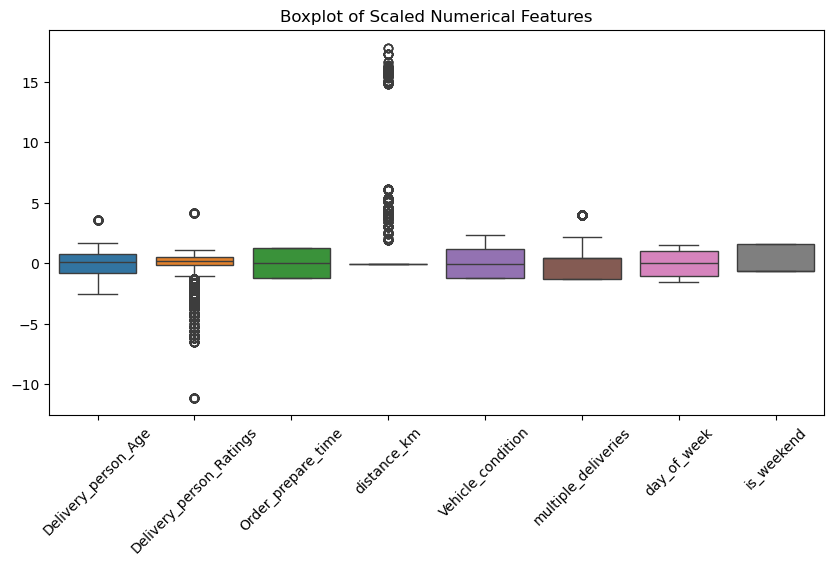

In [1505]:
# Histograms and KDE 
plt.figure(figsize=(15, 15))
for i, col in enumerate(transform_num):
    plt.subplot(3, 3, i+1)
    sns.histplot(trans_train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplot 
plt.figure(figsize=(10, 5))
sns.boxplot(data=trans_train_df[transform_num])
plt.xticks(rotation=45)
plt.title("Boxplot of Scaled Numerical Features")
plt.show()

In [1506]:
trans_train_df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Order_prepare_time,distance_km,Vehicle_condition,multiple_deliveries,day_of_week,is_weekend,Weatherconditions,Road_traffic_density,Type_of_vehicle,Festival,City
count,4.559300e+04,4.559300e+04,4.559300e+04,4.559300e+04,4.559300e+04,4.559300e+04,4.559300e+04,4.559300e+04,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,8.041586e-17,1.983591e-15,1.517927e-16,-3.818195e-18,1.215589e-17,-7.387039e-17,-4.114300e-17,-8.275354e-17,2.462308,1.735793,2.248415,0.019652,0.448227
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.702763,0.932059,0.602468,0.138803,0.831844
min,-2.560401e+00,-1.109035e+01,-1.244611e+00,-8.885712e-02,-1.219656e+00,-1.322160e+00,-1.521895e+00,-6.159131e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.048668e-01,-1.114712e-01,-1.244611e+00,-8.595658e-02,-1.219656e+00,-1.322160e+00,-1.014203e+00,-6.159131e-01,1.000000,1.000000,2.000000,0.000000,0.000000
50%,7.290052e-02,1.934977e-01,2.543930e-03,-8.178094e-02,-2.783945e-02,4.401917e-01,1.180342e-03,-6.159131e-01,2.000000,2.000000,2.000000,0.000000,0.000000
75%,7.751143e-01,4.984665e-01,1.249699e+00,-7.769525e-02,1.163977e+00,4.401917e-01,1.016564e+00,1.623606e+00,4.000000,2.000000,3.000000,0.000000,0.000000
max,3.583970e+00,4.158093e+00,1.249699e+00,1.782902e+01,2.355793e+00,3.964895e+00,1.524256e+00,1.623606e+00,5.000000,3.000000,3.000000,1.000000,2.000000


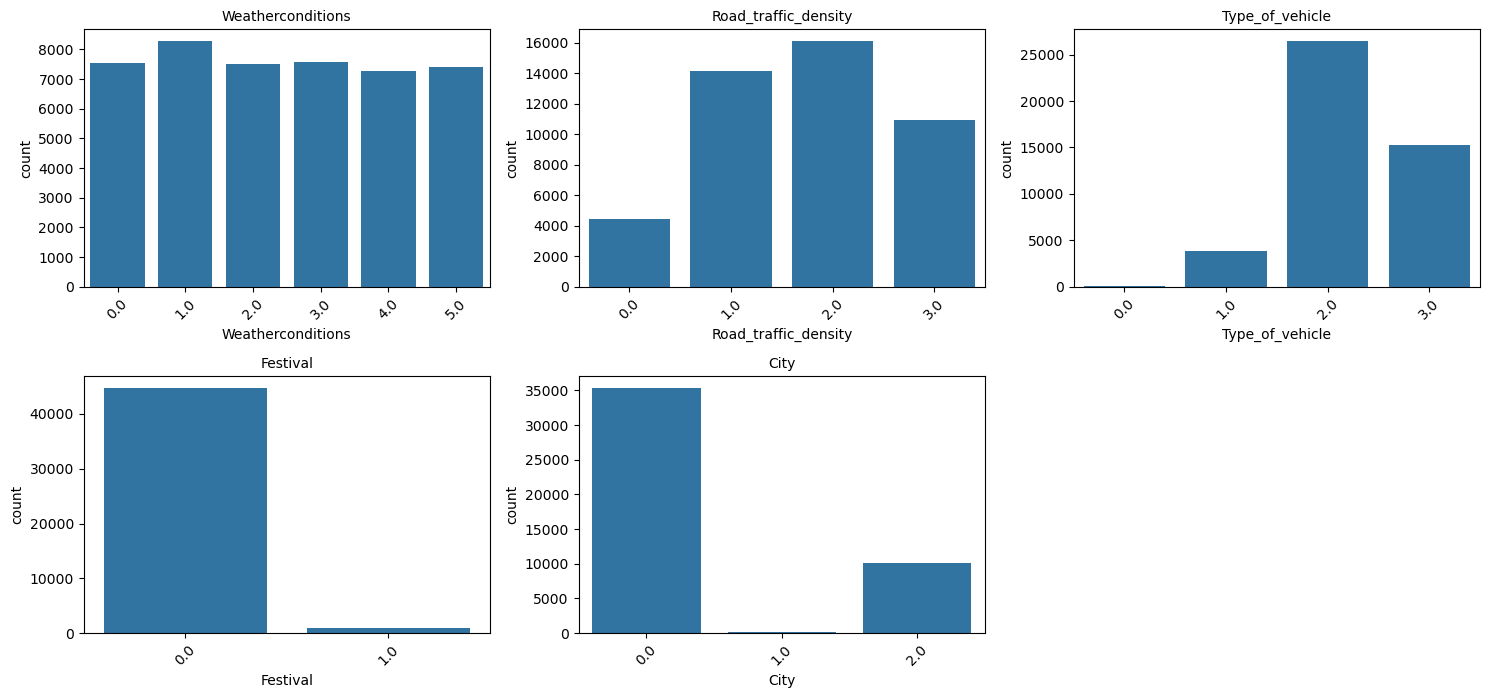

In [1507]:
# Countplot for categorical 

fig = plt.figure(figsize=(15, 10))
for i, col in enumerate(transform_cat, start=1):
    plt.subplot(3, 3, i)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
    sns.countplot(data=trans_train_df, x=col)
plt.tight_layout()
plt.show()

In [1823]:
outliers_trans = {}

for col in transform_num:
    outliers_trans[col] = detect_outliers(trans_train_df, col)

for col, outlier_data in outliers_trans.items():
    print(f"Outliers in column '{col}': {len(outlier_data)}")

Outliers in column 'Delivery_person_Age': 53
Outliers in column 'Delivery_person_Ratings': 5345
Outliers in column 'Order_prepare_time': 0
Outliers in column 'distance_km': 431
Outliers in column 'Vehicle_condition': 0
Outliers in column 'multiple_deliveries': 361
Outliers in column 'day_of_week': 0
Outliers in column 'is_weekend': 0


In [1825]:
trans_train_df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Order_prepare_time',
       'distance_km', 'Vehicle_condition', 'multiple_deliveries',
       'day_of_week', 'is_weekend', 'Weatherconditions',
       'Road_traffic_density', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [1827]:
trans_train_df.shape

(45593, 13)

In [1829]:
# Label Encoder to test set

for col, le in label_encoders.items():
    test[col] = le.transform(test[col]) 
    
X_test = test.drop(columns=['Type_of_order', 'City_code', 'month'])

transformed_test = pipeline.transform(X_test)  
trans_test_df = pd.DataFrame(transformed_test, columns=transformed_col_names)

trans_test_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_prepare_time,distance_km,Vehicle_condition,multiple_deliveries,day_of_week,is_weekend,Weatherconditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,0.072901,0.193498,0.002544,-0.084533,2.355793,0.440192,-0.506512,-0.615913,4.0,2.0,1.0,0.0,0.0
1,-0.278206,-0.111471,-1.244611,-0.074693,-1.219656,0.440192,-1.014203,-0.615913,5.0,1.0,2.0,0.0,0.0
2,-1.155974,-0.416440,0.002544,-0.078014,-1.219656,0.440192,0.001180,-0.615913,3.0,1.0,2.0,0.0,0.0
3,-1.507081,0.498467,-1.244611,-0.078007,-0.027839,0.440192,1.016564,1.623606,1.0,3.0,3.0,0.0,0.0
4,0.248454,-0.111471,1.249699,-0.074693,1.163977,0.440192,1.524256,1.623606,4.0,3.0,3.0,0.0,0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/1304552724.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




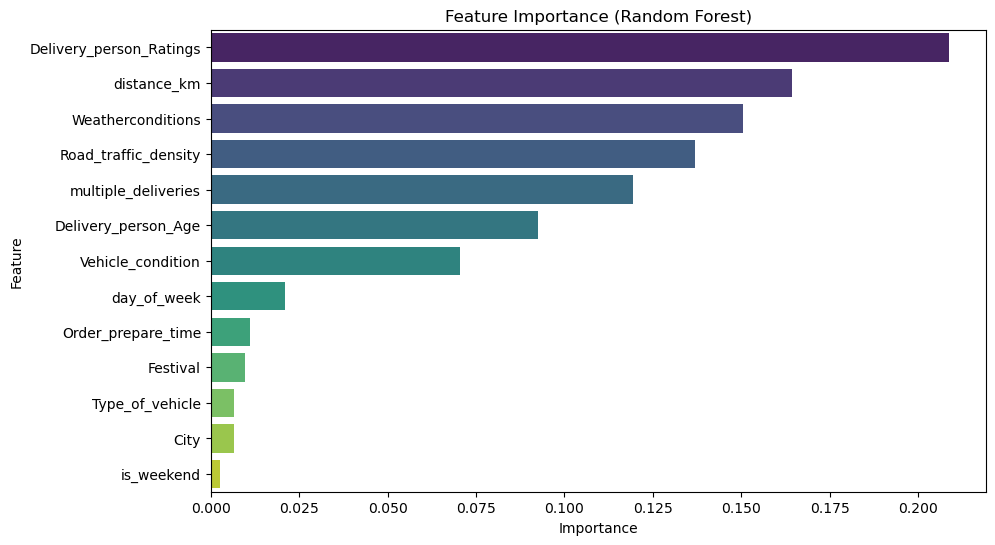

Selected 9 out of 13 features.


In [1831]:
#Feature Selection using Random Forest 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score

X_train, X_val, y_train, y_val = train_test_split(trans_train_df, y_train_scaled, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
 
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()

threshold = 0.01
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature'].tolist()
X_train_selected = X_train[important_features]
X_val_selected = X_val[important_features]
print(f"Selected {len(important_features)} out of {X_train.shape[1]} features.")

/var/folders/8h/vxxz_g496lq1tnl0m7fphzvm0000gn/T/ipykernel_28120/2262083873.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




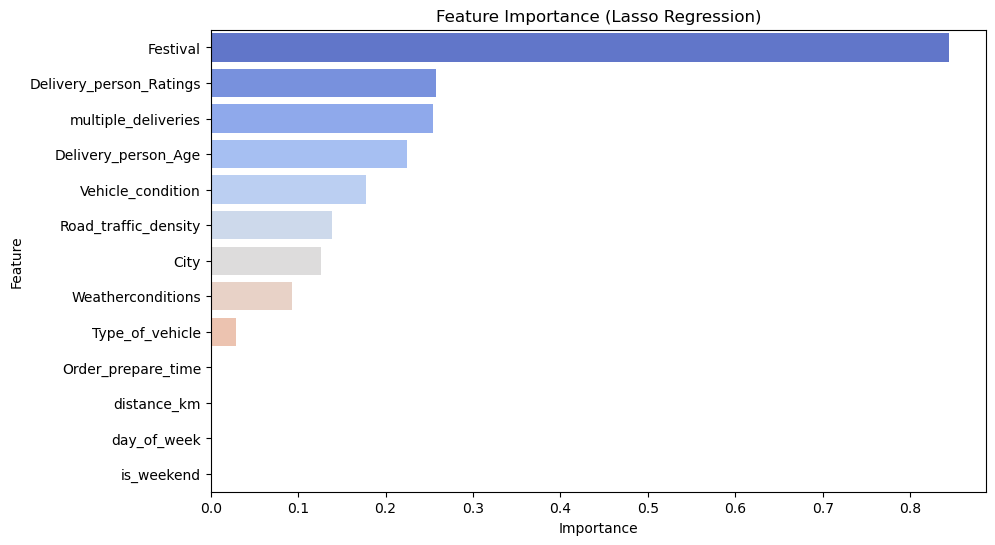

Selected 9 out of 13 features using Lasso.


In [1833]:
# Feature Selection using Lasso Regression 

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lasso_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(lasso.coef_)})
lasso_importance = lasso_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_importance, x='Importance', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Lasso Regression)")
plt.show()

# Select important features (Importance > 0)
selected_features_lasso = lasso_importance[lasso_importance['Importance'] > 0]['Feature'].tolist()
X_train_selected_lasso = X_train[selected_features_lasso]
X_val_selected_lasso = X_val[selected_features_lasso]
print(f"Selected {len(selected_features_lasso)} out of {X_train.shape[1]} features using Lasso.")

In [1835]:
print(important_features)
print("\n", selected_features_lasso)

['Delivery_person_Ratings', 'distance_km', 'Weatherconditions', 'Road_traffic_density', 'multiple_deliveries', 'Delivery_person_Age', 'Vehicle_condition', 'day_of_week', 'Order_prepare_time']

 ['Festival', 'Delivery_person_Ratings', 'multiple_deliveries', 'Delivery_person_Age', 'Vehicle_condition', 'Road_traffic_density', 'City', 'Weatherconditions', 'Type_of_vehicle']


In [1837]:
# Compare before and after feature selection

# Train model using all features
rf_all = RandomForestRegressor(random_state=42)
rf_all.fit(X_train, y_train)
y_pred_all = rf_all.predict(X_val)  
r2_all = r2_score(y_val, y_pred_all)

# Train a model using selected features (Random Forest)
rf_selected = RandomForestRegressor(random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_val_selected)
r2_selected = r2_score(y_val, y_pred_selected)

# Train a model using Lasso selected features
rf_lasso = RandomForestRegressor(random_state=42)
rf_lasso.fit(X_train_selected_lasso, y_train)
y_pred_lasso = rf_lasso.predict(X_val_selected_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print(f"R² Score with All Features: {r2_all:.4f}")
print(f"R² Score with Selected Features (Random Forest): {r2_selected:.4f}")
print(f"R² Score with Selected Features (Lasso): {r2_lasso:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R² Score with All Features: 0.8088
R² Score with Selected Features (Random Forest): 0.7958
R² Score with Selected Features (Lasso): 0.6467


In [1838]:
# Modeling and Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

def evaluate_models(X_train, X_val, y_train, y_val):
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        r2 = r2_score(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        
        results.append([name, r2, mae, rmse])
    
    return pd.DataFrame(results, columns=['Model', 'R² Score', 'MAE', 'RMSE'])

all_features_results = evaluate_models(X_train, X_val, y_train, y_val)
rf_features_results = evaluate_models(X_train_selected, X_val_selected, y_train, y_val)
lasso_features_results = evaluate_models(X_train_selected_lasso, X_val_selected_lasso, y_train, y_val)

print("\nPerformance with All Features:")
print(all_features_results)
print("\nPerformance with Selected Features (Random Forest):")
print(rf_features_results)
print("\nPerformance with Selected Features (Lasso):")
print(lasso_features_results)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversion


Performance with All Features:
               Model  R² Score       MAE      RMSE
0  Linear Regression  0.424850  0.604921  0.756766
1   Ridge Regression  0.424844  0.604927  0.756771
2   Lasso Regression -0.000014  0.807677  0.997871
3      Random Forest  0.808772  0.344451  0.436362
4  Gradient Boosting  0.774242  0.377934  0.474125
5                SVR  0.593279  0.493431  0.636385
6            XGBoost  0.813150  0.341739  0.431339
7                KNN  0.572586  0.505729  0.652372

Performance with Selected Features (Random Forest):
               Model  R² Score       MAE      RMSE
0  Linear Regression  0.371887  0.632526  0.790843
1   Ridge Regression  0.371887  0.632527  0.790843
2   Lasso Regression -0.000014  0.807677  0.997871
3      Random Forest  0.795825  0.353181  0.450892
4  Gradient Boosting  0.762043  0.386862  0.486767
5                SVR  0.585187  0.497540  0.642684
6            XGBoost  0.799451  0.352786  0.446871
7                KNN  0.607238  0.483015  0.6253

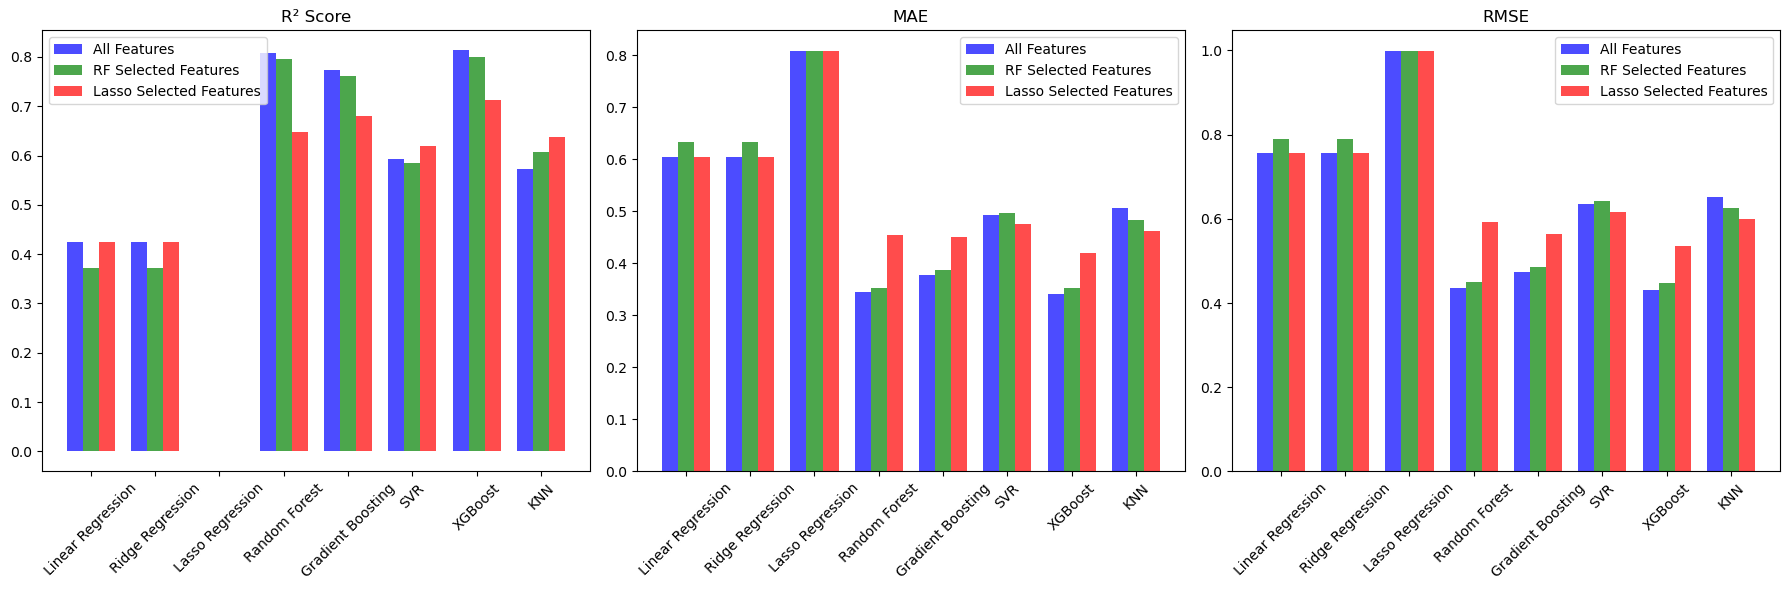

In [1841]:
comparison_df = all_features_results.copy()

comparison_df['R² Score (RF Selected)'] = rf_features_results['R² Score']
comparison_df['MAE (RF Selected)'] = rf_features_results['MAE']
comparison_df['RMSE (RF Selected)'] = rf_features_results['RMSE']

comparison_df['R² Score (Lasso Selected)'] = lasso_features_results['R² Score']
comparison_df['MAE (Lasso Selected)'] = lasso_features_results['MAE']
comparison_df['RMSE (Lasso Selected)'] = lasso_features_results['RMSE']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ["R² Score", "MAE", "RMSE"]
colors = ["blue", "green", "red"] 

for i, metric in enumerate(metrics):
    x = range(len(comparison_df['Model']))  
    
    axes[i].bar(x, comparison_df[metric], width=0.25, label='All Features', alpha=0.7, color=colors[0])
    axes[i].bar([p + 0.25 for p in x], comparison_df[f"{metric} (RF Selected)"], width=0.25, label='RF Selected Features', alpha=0.7, color=colors[1])
    axes[i].bar([p + 0.50 for p in x], comparison_df[f"{metric} (Lasso Selected)"], width=0.25, label='Lasso Selected Features', alpha=0.7, color=colors[2])
    
    axes[i].set_title(metric)
    axes[i].set_xticks([p + 0.25 for p in x])  
    axes[i].set_xticklabels(comparison_df['Model'], rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

In [1671]:
# Hyperparameter tuning 
# Tuning XGBoost, Random Forest and Gradient Boosting (top performing models)
# Compare with all features and selected features by random forest (best scoring)

from sklearn.model_selection import GridSearchCV

param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "subsample": [0.8, 1.0]
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "subsample": [0.8, 1.0],
        "colsample_bytree": [0.8, 1.0]
    }
}

def tune_models(X_train, y_train, param_grids):
    tuned_results = []
    best_models = {}

    models = {
        "Random Forest": RandomForestRegressor(random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42)
    }

    for name, model in models.items():
        print(f"\nTuning {name}...")
        param_grid = param_grids[name]

        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', 
                                   n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_

        tuned_results.append([name, best_params, best_score])
        best_models[name] = best_model

    return pd.DataFrame(tuned_results, columns=['Model', 'Best Parameters', 'Best R² Score']), best_models


tuned_results_all, best_models_all = tune_models(X_train, y_train, param_grids)
tuned_results_rf, best_models_rf = tune_models(X_train_selected, y_train, param_grids)

print("\nTuned Model Performance (All Features):")
print(tuned_results_all)
print("\nTuned Model Performance (Selected Features):")
print(tuned_results_rf)


Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


Tuning Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y w


Tuning XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


Tuning Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y w


Tuning XGBoost...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Tuned Model Performance (All Features):
               Model                                    Best Parameters  \
0      Random Forest  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...   
1  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...   
2            XGBoost  {'colsample_bytree': 1.0, 'learning_rate': 0.1...   

   Best R² Score  
0       0.824923  
1       0.823031  
2       0.822746  

Tuned Model Performance (Selected Features):
               Model                                    Best Parameters  \
0      Random Forest  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...   
1  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 10, 'n_est...   
2            XGBoost  {'colsample_bytree': 1.0, 'learning_rate': 0.1...   

   Best R² Score  
0       0.820896  
1       0.813528  
2       0.813951  


In [1843]:
print(best_models_all)
print()
print(best_models_rf)

{'Random Forest': RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42), 'Gradient Boosting': GradientBoostingRegressor(max_depth=10, n_estimators=50, random_state=42,
                          subsample=0.8), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, r

In [1845]:
# Evaluate tuned models 

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return r2, mae, rmse

results_val_all = {}
for name, model in best_models_all.items():
    results_val_all[name] = evaluate_model(model, X_val, y_val)

results_val_rf = {}
for name, model in best_models_rf.items():
    results_val_rf[name] = evaluate_model(model, X_val_selected, y_val)

results_df_all = pd.DataFrame.from_dict(results_val_all, orient='index', columns=["R² Score", "MAE", "RMSE"])
results_df_rf = pd.DataFrame.from_dict(results_val_rf, orient='index', columns=["R² Score", "MAE", "RMSE"])

print("\nValidation Set Performance (All Features):")
print(results_df_all)
print("\nValidation Set Performance (Selected Features - RF):")
print(results_df_rf)


Validation Set Performance (All Features):
                   R² Score       MAE      RMSE
Random Forest      0.822633  0.336083  0.420250
Gradient Boosting  0.819862  0.336091  0.423520
XGBoost            0.821292  0.335442  0.421835

Validation Set Performance (Selected Features - RF):
                   R² Score       MAE      RMSE
Random Forest      0.817852  0.340824  0.425876
Gradient Boosting  0.807976  0.345554  0.437270
XGBoost            0.810146  0.344707  0.434792


In [1847]:
compare_drop = ['R² Score (Lasso Selected)', 'MAE (Lasso Selected)', 'RMSE (Lasso Selected)']
tuned_models = ['Random Forest', 'Gradient Boosting', 'XGBoost']

compare_df = comparison_df.drop(columns=compare_drop).copy()
compare_df = compare_df[compare_df['Model'].isin(tuned_models)]

compare_df

,Model,R² Score,MAE,RMSE,R² Score (RF Selected),MAE (RF Selected),RMSE (RF Selected)
3,Random Forest,0.808772,0.344451,0.436362,0.795825,0.353181,0.450892
4,Gradient Boosting,0.774242,0.377934,0.474125,0.762043,0.386862,0.486767
6,XGBoost,0.813150,0.341739,0.431339,0.799451,0.352786,0.446871


In [1849]:
compare_df = compare_df.set_index('Model')

compare_df['R² Score (Tuned)'] = results_df_all['R² Score']
compare_df['MAE (Tuned)'] = results_df_all['MAE']
compare_df['RMSE (Tuned)'] = results_df_all['RMSE']

compare_df['R² Score (RF Tuned)'] = results_df_rf['R² Score']
compare_df['MAE (RF Tuned)'] = results_df_rf['MAE']
compare_df['RMSE (RF Tuned)'] = results_df_rf['RMSE']

compare_df = compare_df.reset_index()

compare_df

,Model,R² Score,MAE,RMSE,R² Score (RF Selected),MAE (RF Selected),RMSE (RF Selected),R² Score (Tuned),MAE (Tuned),RMSE (Tuned),R² Score (RF Tuned),MAE (RF Tuned),RMSE (RF Tuned)
0,Random Forest,0.808772,0.344451,0.436362,0.795825,0.353181,0.450892,0.822633,0.336083,0.420250,0.817852,0.340824,0.425876
1,Gradient Boosting,0.774242,0.377934,0.474125,0.762043,0.386862,0.486767,0.819862,0.336091,0.423520,0.807976,0.345554,0.437270
2,XGBoost,0.813150,0.341739,0.431339,0.799451,0.352786,0.446871,0.821292,0.335442,0.421835,0.810146,0.344707,0.434792


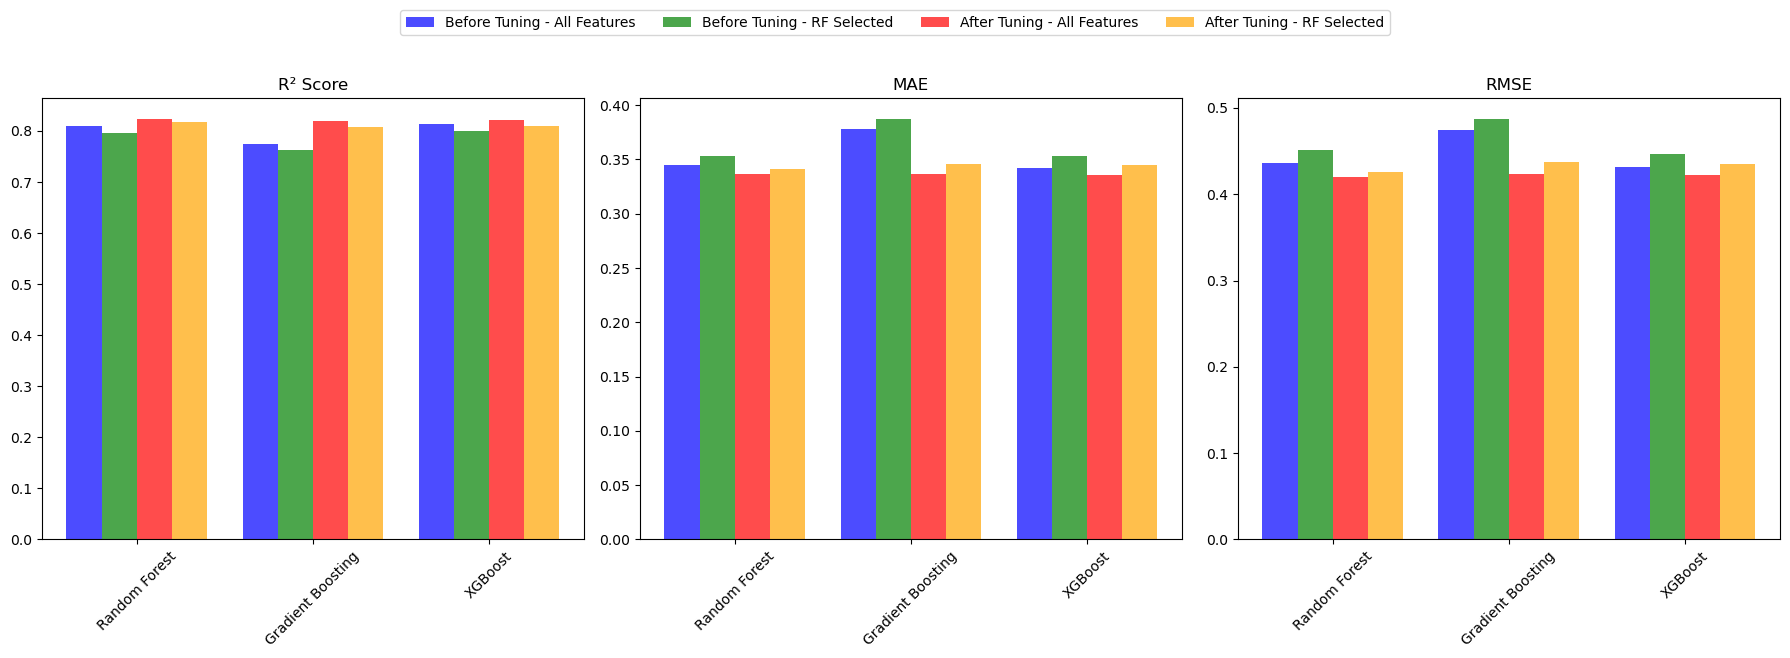

In [1851]:
# Compare pre-tuned models and tuned models

metrics = ['R² Score', 'MAE', 'RMSE']
colors = ['blue', 'green', 'red', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# X locations for bars
x = np.arange(len(compare_df['Model']))
bar_width = 0.20
bars = []

for i, metric in enumerate(metrics):
    bars.append(axes[i].bar(x - 1.5 * bar_width, compare_df[metric], width=bar_width, label='Before Tuning - All Features', alpha=0.7, color=colors[0]))
    bars.append(axes[i].bar(x - 0.5 * bar_width, compare_df[f"{metric} (RF Selected)"], width=bar_width, label='Before Tuning - RF Selected', alpha=0.7, color=colors[1]))
    bars.append(axes[i].bar(x + 0.5 * bar_width, compare_df[f"{metric} (Tuned)"], width=bar_width, label='After Tuning - All Features', alpha=0.7, color=colors[2]))
    bars.append(axes[i].bar(x + 1.5 * bar_width, compare_df[f"{metric} (RF Tuned)"], width=bar_width, label='After Tuning - RF Selected', alpha=0.7, color=colors[3]))

    axes[i].set_title(metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(compare_df['Model'], rotation=45)
    
fig.legend(['Before Tuning - All Features', 'Before Tuning - RF Selected', 
            'After Tuning - All Features', 'After Tuning - RF Selected'], 
           loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=4)

plt.tight_layout()
plt.show()

In [1859]:
trans_test_df

,Delivery_person_Age,Delivery_person_Ratings,Order_prepare_time,distance_km,Vehicle_condition,multiple_deliveries,day_of_week,is_weekend,Weatherconditions,Road_traffic_density,Type_of_vehicle,Festival,City
0,0.072901,0.193498,0.002544,-0.084533,2.355793,0.440192,-0.506512,-0.615913,4.0,2.0,1.0,0.0,0.0
1,-0.278206,-0.111471,-1.244611,-0.074693,-1.219656,0.440192,-1.014203,-0.615913,5.0,1.0,2.0,0.0,0.0
2,-1.155974,-0.416440,0.002544,-0.078014,-1.219656,0.440192,0.001180,-0.615913,3.0,1.0,2.0,0.0,0.0
3,-1.507081,0.498467,-1.244611,-0.078007,-0.027839,0.440192,1.016564,1.623606,1.0,3.0,3.0,0.0,0.0
4,0.248454,-0.111471,1.249699,-0.074693,1.163977,0.440192,1.524256,1.623606,4.0,3.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0.950668,-0.111471,0.002544,-0.075309,-0.027839,0.440192,1.524256,1.623606,4.0,1.0,3.0,0.0,0.0
11395,0.599561,0.803435,-1.244611,-0.088835,-0.027839,0.440192,0.508872,-0.615913,2.0,0.0,3.0,0.0,0.0
11396,0.072901,0.193498,0.002544,-0.081908,2.355793,0.440192,0.508872,-0.615913,4.0,2.0,3.0,0.0,0.0
11397,-0.453760,0.193498,-1.244611,-0.072315,-1.219656,-1.322160,1.524256,1.623606,2.0,3.0,2.0,0.0,0.0


In [1871]:
# Prediction on Test set

best_tuned_model = best_models_all["Random Forest"]

y_pred_scaled = best_tuned_model.predict(trans_test_df)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  

In [1873]:
y_pred

array([[14.60142098],
       [30.60544972],
       [28.40609144],
       ...,
       [14.60142098],
       [26.66027442],
       [24.32767322]])

In [1877]:
submission_df = pd.DataFrame({
    "ID": test_Id,  
    "Time_taken(min)": y_pred.flatten()  
})

In [1879]:
submission_df

,ID,Time_taken(min)
0,0x2318,14.601421
1,0x3474,30.605450
2,0x9420,28.406091
3,0x72ee,30.742456
4,0xa759,22.367088
...,...,...
11394,0x6909,22.507975
11395,0x443b,28.481679
11396,0x1ea5,14.601421
11397,0x22d4,26.660274


In [1881]:
submission_df.to_csv("final_submission.csv", index=False)